In [1]:
library('tidyverse')
library('palmerpenguins')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


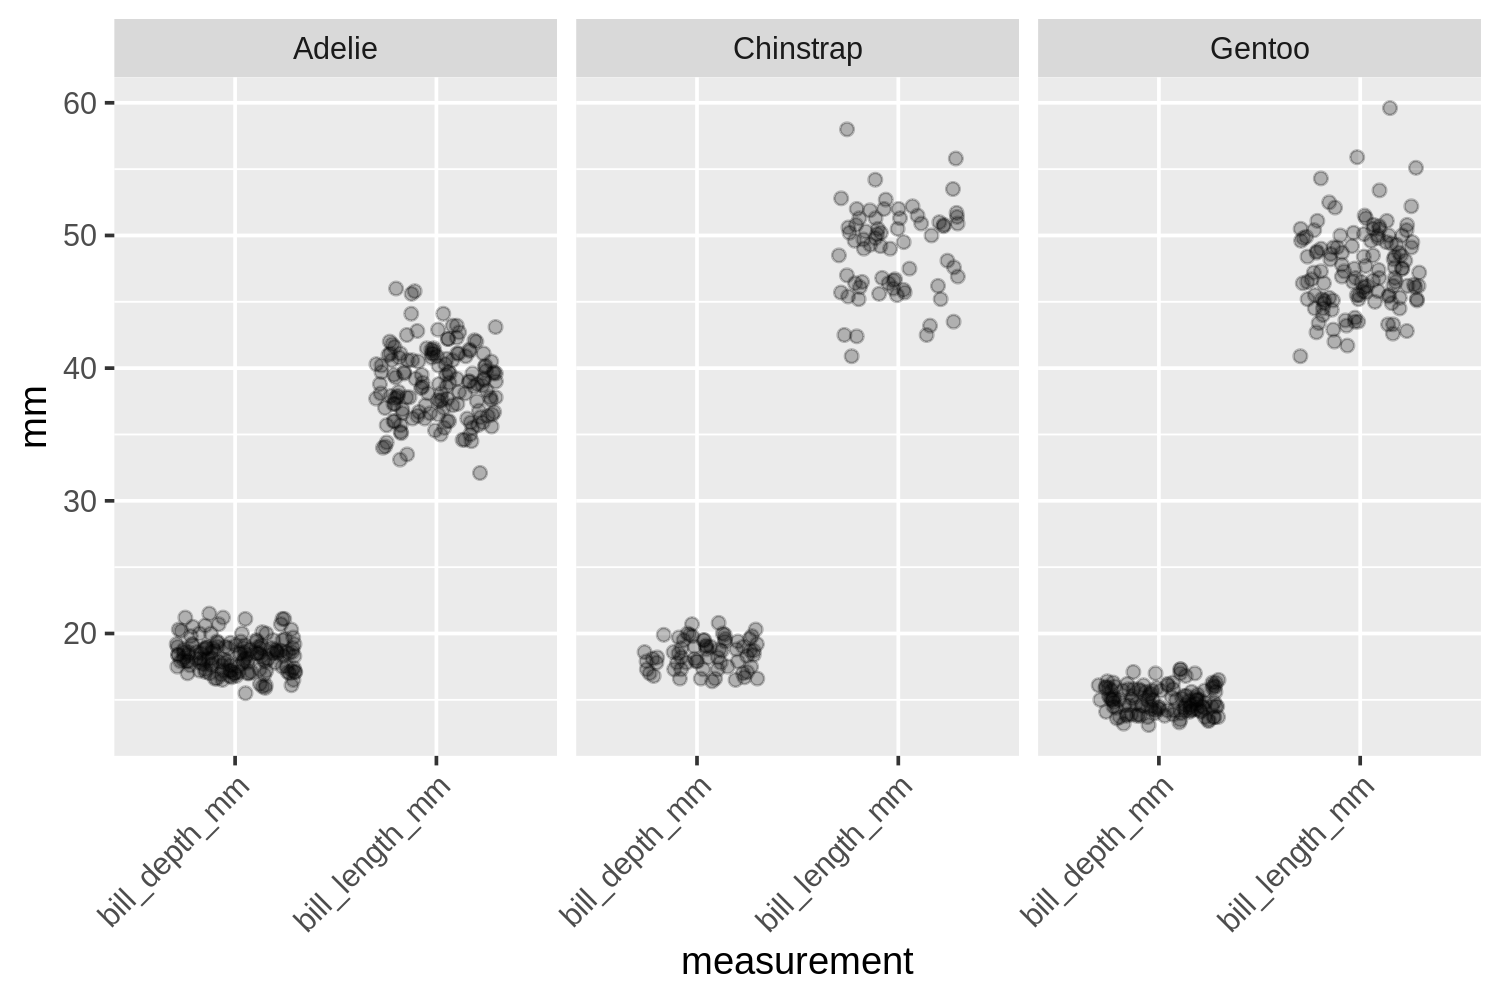

In [2]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)

penguins |>
    pivot_longer(starts_with('bill_'), names_to = 'measurement') |>

ggplot(aes(x = measurement, y = value)) + 
    geom_point(alpha = 0.25, na.rm = T, position = position_jitter(width = 0.3, height = 0)) +
    facet_wrap(~species, nrow = 1) +
    labs(y = 'mm') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [3]:
penguins2 = penguins |>
    pivot_longer(c(bill_depth_mm, bill_length_mm), 
                 names_to = 'measurement', 
                 values_to = 'measurement_value') |> head()
    
# the cols you want to rotate, the names you want to give it
# c is the collection of values

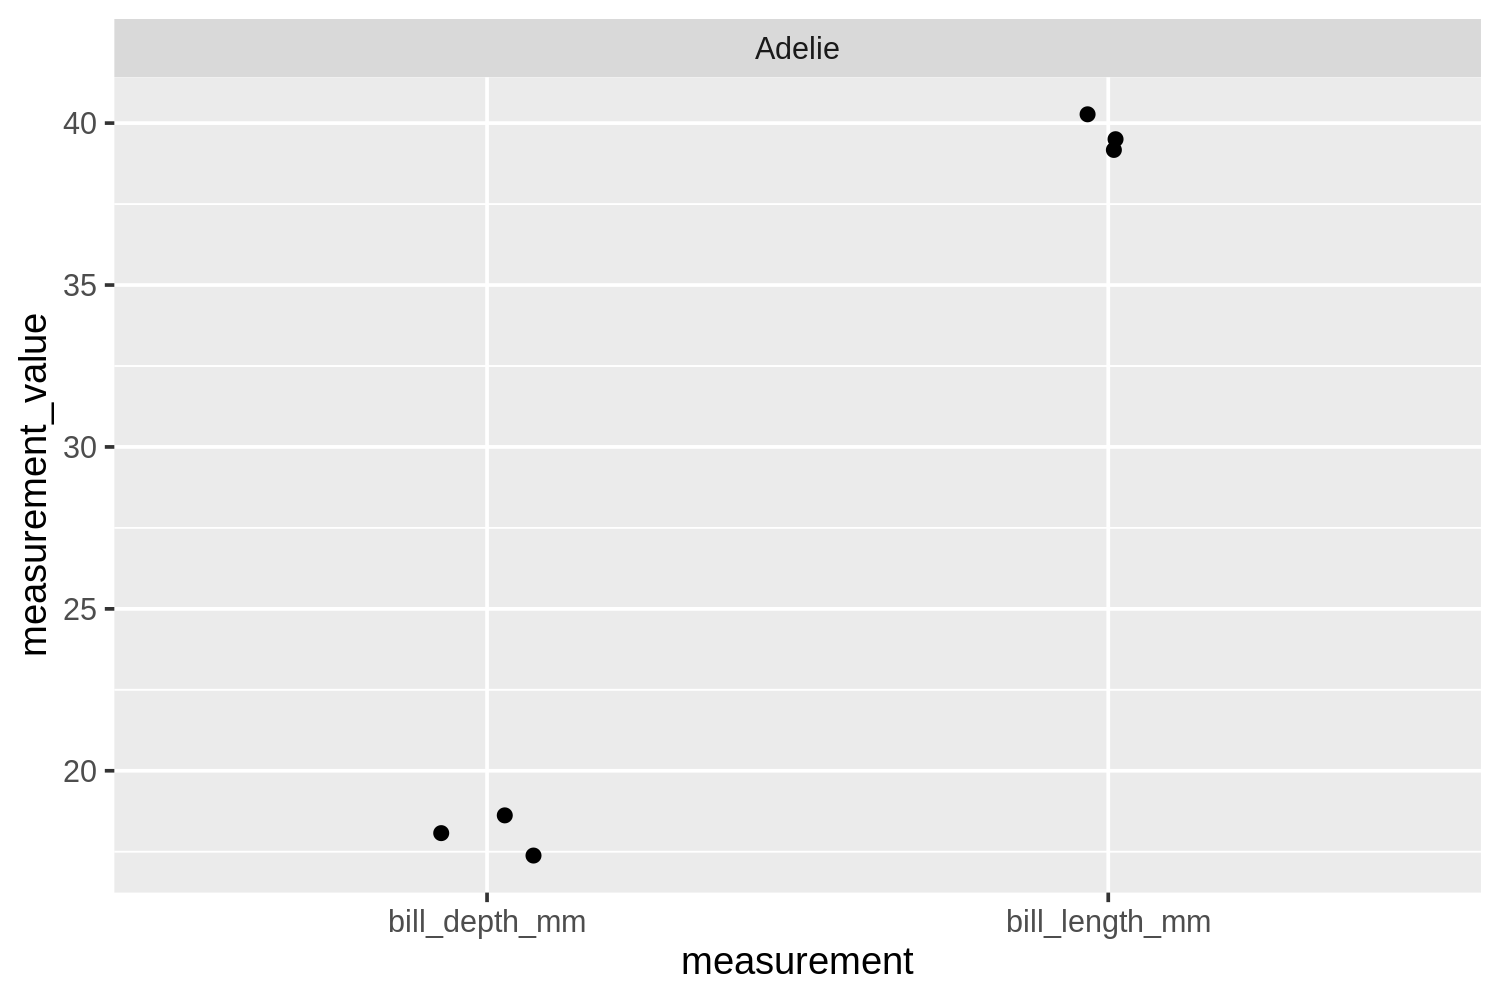

In [4]:
p = ggplot(penguins2, aes(x=measurement, y=measurement_value)) +
    geom_point(position = position_jitter(width = 0.1, height = 0.1)) +
    facet_wrap(~species) 

p

[Google Sheet example](https://docs.google.com/spreadsheets/d/1t085cM-8GLGHk7ZAqtTambrGi7PR1yXZgID964rg5Qw/edit#gid=1425423640)

# `pivot_longer`

In [5]:
iris |> as_tibble() |> print() 

# A tibble: 150 × 5
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
          <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1          5.1         3.5          1.4         0.2 setosa 
 2          4.9         3            1.4         0.2 setosa 
 3          4.7         3.2          1.3         0.2 setosa 
 4          4.6         3.1          1.5         0.2 setosa 
 5          5           3.6          1.4         0.2 setosa 
 6          5.4         3.9          1.7         0.4 setosa 
 7          4.6         3.4          1.4         0.3 setosa 
 8          5           3.4          1.5         0.2 setosa 
 9          4.4         2.9          1.4         0.2 setosa 
10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


How would we compare distribution of values for each measurement?

![](https://github.com/gadenbuie/tidyexplain/raw/main/images/tidyr-pivoting.gif)

In [6]:
iris |>
    as_tibble() |>
    pivot_longer(cols = c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)) |>
    print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [7]:
iris |>
    as_tibble() |>
    pivot_longer(cols = c(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)) |>
    print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [9]:
iris |>
    as_tibble() |>
    pivot_longer(!c(Species, Sepal.Length)) |>
    print()

# pivot everything but the species column

# A tibble: 450 × 4
   Sepal.Length Species name         value
          <dbl> <fct>   <chr>        <dbl>
 1          5.1 setosa  Sepal.Width    3.5
 2          5.1 setosa  Petal.Length   1.4
 3          5.1 setosa  Petal.Width    0.2
 4          4.9 setosa  Sepal.Width    3  
 5          4.9 setosa  Petal.Length   1.4
 6          4.9 setosa  Petal.Width    0.2
 7          4.7 setosa  Sepal.Width    3.2
 8          4.7 setosa  Petal.Length   1.3
 9          4.7 setosa  Petal.Width    0.2
10          4.6 setosa  Sepal.Width    3.1
# … with 440 more rows


In [10]:
# Plot histogram of each "name"

iris_long = iris |>
    as_tibble() |>
    pivot_longer(cols = !c(Species))

# `pivot_wider`

![](https://github.com/gadenbuie/tidyexplain/raw/main/images/tidyr-pivoting.gif)

In [11]:
iris_long |> print()

# A tibble: 600 × 3
   Species name         value
   <fct>   <chr>        <dbl>
 1 setosa  Sepal.Length   5.1
 2 setosa  Sepal.Width    3.5
 3 setosa  Petal.Length   1.4
 4 setosa  Petal.Width    0.2
 5 setosa  Sepal.Length   4.9
 6 setosa  Sepal.Width    3  
 7 setosa  Petal.Length   1.4
 8 setosa  Petal.Width    0.2
 9 setosa  Sepal.Length   4.7
10 setosa  Sepal.Width    3.2
# … with 590 more rows


In [12]:
# Why won't this work?

iris_long %>% 
    pivot_wider(names_from = name, values_from = value)

Warning message:
“Values from `value` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(Species, name) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<list>,<list>,<list>,<list>
setosa,"5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0","3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3","1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4","0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2"
versicolor,"7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7","3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8","4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1","1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3"
virginica,"6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9","3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0","6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1","2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8"


In [13]:
iris |>
    as_tibble() |>
    mutate(id = row_number()) |> print()

# A tibble: 150 × 6
   Sepal.Length Sepal.Width Petal.Length Petal.Width Species    id
          <dbl>       <dbl>        <dbl>       <dbl> <fct>   <int>
 1          5.1         3.5          1.4         0.2 setosa      1
 2          4.9         3            1.4         0.2 setosa      2
 3          4.7         3.2          1.3         0.2 setosa      3
 4          4.6         3.1          1.5         0.2 setosa      4
 5          5           3.6          1.4         0.2 setosa      5
 6          5.4         3.9          1.7         0.4 setosa      6
 7          4.6         3.4          1.4         0.3 setosa      7
 8          5           3.4          1.5         0.2 setosa      8
 9          4.4         2.9          1.4         0.2 setosa      9
10          4.9         3.1          1.5         0.1 setosa     10
# … with 140 more rows


In [14]:
# Plat Sepal.Length vs. Sepal.Width (starting with iris_long2)

iris_long2 = iris |>
    as_tibble() |>
    mutate(id = row_number()) |>
    pivot_longer(cols = !c(Species, id))

iris_wide = iris_long2 |>
    pivot_wider(id_cols = c(id, Species), names_from = name, values_from = value)

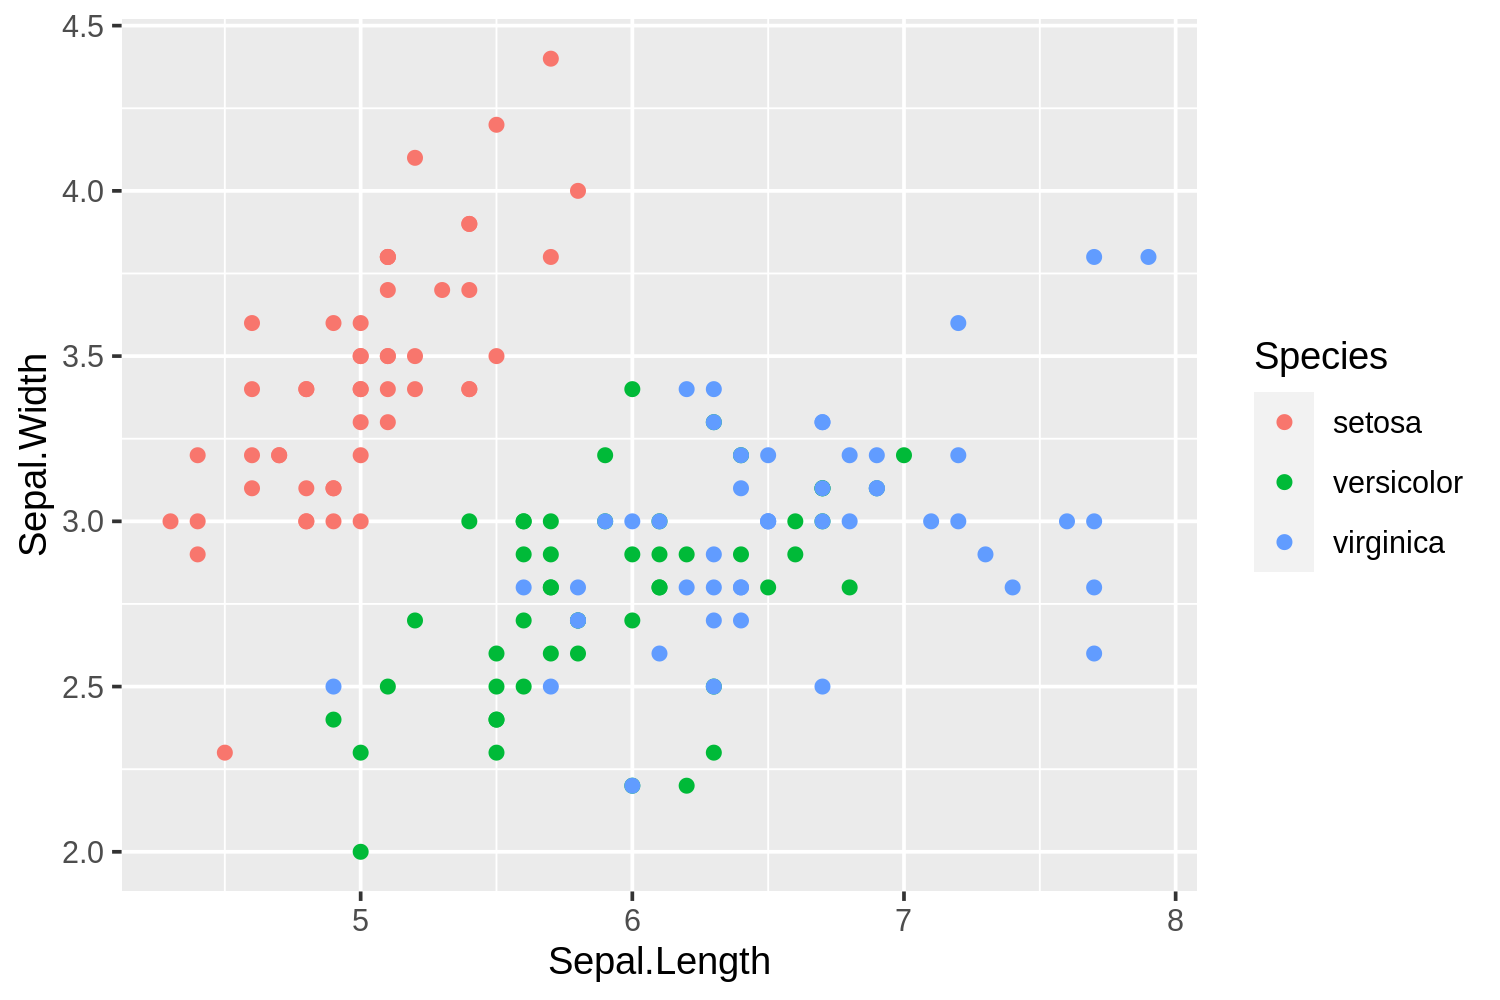

In [16]:
p = ggplot(iris_wide, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point()
           
p